In [1]:
#Clustering Algorithm to differentiate between different swings
#Apply to all TrackMan and MoCap variables
#To convert linear values to nominal values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
#import practice data
path = 'data_all_days_dummy_grinds.csv'
data = pd.read_csv(path)

In [4]:
data.head()

,Shot No,Player,Grind,Club,Ball Speed,Launch Angle,Launch Direction,Back Spin,Side Spin,Height,...,fangAddress,FCtoBalldist,FCtoBallvert,FCtoBallhorz,gearAngleHoriz5,gearAngleVert5,impactDecel1,impactDecel2,impactDecelY1,impactDecelY2
0,1,ASHCRJ,K,WedgeFull,65.618845,36.632,1.749,9722.188309,68.553552,19.266257,...,-17.88866,2.898298,-36.15008,-12.904290,1087.0650,-393.31350,-3936.952,-3531.387,59.75694,386.1915
1,2,ASHCRJ,K,WedgeFull,64.055448,35.189,0.737,10199.499500,565.062130,17.439694,...,-19.51269,3.129037,-23.44809,1.370438,493.4296,-1340.64100,-2773.441,-2796.626,1009.97100,1410.2570
2,3,ASHCRJ,K,WedgeFull,63.824148,33.983,-1.022,10795.510860,1480.528651,16.370781,...,-22.14582,2.418964,-10.36565,-10.458640,1804.1540,-639.50260,-2865.668,-2956.055,1416.81200,1560.8320
3,4,ASHCRJ,K,WedgeFull,67.615538,35.412,-2.120,10855.452320,1300.199401,19.532534,...,-23.41601,5.775664,-32.17316,-11.850840,832.7874,-615.64220,-4377.491,-4249.827,556.46950,619.1689
4,5,ASHCRJ,K,WedgeFull,67.720450,35.563,1.230,11587.981740,1119.470069,19.171681,...,-21.09691,3.116765,-32.20869,-12.990150,2486.2300,43.05322,-4250.855,-3984.704,790.62530,1083.7720


## FEATURE REDUCTION

In [5]:
#make a copy of the data just in case
data_new=data.copy()

In [6]:
#replace string values with integers
grind_mapping = {"K": 0, "D": 1, "S": 2, "M": 3, "L": 4}
data_new['Grind'] = data_new['Grind'].map(grind_mapping)

In [7]:
data_new.columns

Index(['Shot No', 'Player', 'Grind', 'Club', 'Ball Speed', 'Launch Angle',
       'Launch Direction', 'Back Spin', 'Side Spin', 'Height', 'Carry', 'Side',
       'Total', 'Curvature', 'Smash Factor', 'Speed', 'Face', 'Loft', 'Toe',
       'Path', 'Attack', 'EffLoft', 'EffFace', 'ImpactX', 'ImpactY', 'ExSpeed',
       'ExFace', 'ExLoft', 'ExToe', 'ExPath', 'ExAttack', 'RotationSA',
       'FaceClosure', 'TAV', 'BSfaceRate', 'GripLean', 'GripXY', 'GripLie',
       'GripTwist', 'RigidFace', 'RigidLoft', 'RigidToe', 'Speed-V_FCequal',
       'Speed-V_HCequal', 'leanAddress', 'lieAddress', 'loftAddress',
       'fangAddress', 'FCtoBalldist', 'FCtoBallvert', 'FCtoBallhorz',
       'gearAngleHoriz5', 'gearAngleVert5', 'impactDecel1', 'impactDecel2',
       'impactDecelY1', 'impactDecelY2'],
      dtype='object')

In [12]:
#Delete rows we know we don't need
data_new.drop(["Shot No","Club","Ball Speed","Back Spin","Side Spin","Total","Speed","TAV","BSfaceRate",
              "RigidFace","RigidLoft","RigidToe","Speed-V_FCequal","Speed-V_HCequal", "FCtoBalldist",
               "FCtoBallvert", "FCtoBallhorz", "gearAngleHoriz5", "gearAngleVert5", "impactDecel1",
               "impactDecel2", "impactDecelY1", "impactDecelY2"
              ],axis=1,inplace=True)
print(data_new.shape)
data_new.head()

(423, 34)


,Player,Grind,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,...,RotationSA,FaceClosure,GripLean,GripXY,GripLie,GripTwist,leanAddress,lieAddress,loftAddress,fangAddress
0,ASHCRJ,0,36.632,1.749,19.266257,67.449641,3.092386,1.032791,0.848146,5.416595,...,2109.693,1749.722,8.781921,17.09483,28.19620,-15.87997,-1.696680,34.90726,60.06651,-17.88866
1,ASHCRJ,0,35.189,0.737,17.439694,65.936099,3.858185,3.009997,0.777414,6.303596,...,2186.895,1582.155,9.688515,18.86547,28.91550,-17.08570,-1.142365,35.66370,57.63536,-19.51269
2,ASHCRJ,0,33.983,-1.022,16.370781,64.335100,2.260003,3.407687,0.780192,6.065248,...,2357.555,1645.005,9.403057,18.71065,28.63698,-17.71535,-3.065877,34.70755,57.57423,-22.14582
3,ASHCRJ,0,35.412,-2.120,19.532534,70.187181,0.607811,3.205991,0.825721,3.393124,...,1988.812,1577.514,9.146500,16.49088,30.54483,-16.67243,-1.942997,35.85233,55.85423,-23.41601
4,ASHCRJ,0,35.563,1.230,19.171681,69.739778,5.585029,4.087657,0.803305,9.152328,...,2219.080,1405.993,9.043106,18.24626,28.89260,-15.58142,-1.649299,34.59784,56.22926,-21.09691


In [16]:
#dealing with NaN values

#1 find how many NaN values in each row
NaN_series = data_new.isnull().sum(axis=1).sort_values(ascending=False)

#find a good threshold of rows to just delete completely
#final: delete all rows with more than 10 NaN values (coverage too poor)
z = 0
thresh = 10
bad_rows = NaN_series[(NaN_series > z) == True].shape
worst_rows = NaN_series[(NaN_series > thresh) == True].shape
print(f"Number of Rows w NaN Values: {bad_rows[0]}")
print(f"Number of Rows w more than {thresh} NaN Values: {worst_rows[0]}")

Number of Rows w NaN Values: 60
Number of Rows w more than 10 NaN Values: 15


In [17]:
#delete rows that have NaN values above this threshold
data_drop = NaN_series[(NaN_series > thresh) == True].index
data_new = data_new.drop(data_new.index[data_drop])
print(data_new.shape)
data_new.head()

(408, 34)


,Player,Grind,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,...,RotationSA,FaceClosure,GripLean,GripXY,GripLie,GripTwist,leanAddress,lieAddress,loftAddress,fangAddress
0,ASHCRJ,0,36.632,1.749,19.266257,67.449641,3.092386,1.032791,0.848146,5.416595,...,2109.693,1749.722,8.781921,17.09483,28.19620,-15.87997,-1.696680,34.90726,60.06651,-17.88866
1,ASHCRJ,0,35.189,0.737,17.439694,65.936099,3.858185,3.009997,0.777414,6.303596,...,2186.895,1582.155,9.688515,18.86547,28.91550,-17.08570,-1.142365,35.66370,57.63536,-19.51269
2,ASHCRJ,0,33.983,-1.022,16.370781,64.335100,2.260003,3.407687,0.780192,6.065248,...,2357.555,1645.005,9.403057,18.71065,28.63698,-17.71535,-3.065877,34.70755,57.57423,-22.14582
3,ASHCRJ,0,35.412,-2.120,19.532534,70.187181,0.607811,3.205991,0.825721,3.393124,...,1988.812,1577.514,9.146500,16.49088,30.54483,-16.67243,-1.942997,35.85233,55.85423,-23.41601
4,ASHCRJ,0,35.563,1.230,19.171681,69.739778,5.585029,4.087657,0.803305,9.152328,...,2219.080,1405.993,9.043106,18.24626,28.89260,-15.58142,-1.649299,34.59784,56.22926,-21.09691


In [18]:
#fill NaN values with approximated values
column_names = list(data_new)
for i in range(1,len(data_new.columns)):
    if (data_new.iloc[:,i].isna().any() == True):
        x = data_new.groupby("Player")[column_names[i]].transform('median')
        #fill empty rows with the corresponding median value in this pandas series
        data_new[column_names[i]].fillna(x, inplace=True)

In [19]:
#drop response variable and keep for later
response = data_new['Grind']
players = data_new['Player']
data_new = data_new.drop('Grind', axis=1)
data_new.reset_index(drop=True, inplace=True)

data_new.shape, response.shape

((408, 33), (408,))

In [20]:
response=pd.DataFrame(response)
response.reset_index(drop=True,inplace=True)

In [21]:
data_new.head()

,Player,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,...,RotationSA,FaceClosure,GripLean,GripXY,GripLie,GripTwist,leanAddress,lieAddress,loftAddress,fangAddress
0,ASHCRJ,36.632,1.749,19.266257,67.449641,3.092386,1.032791,0.848146,5.416595,54.76390,...,2109.693,1749.722,8.781921,17.09483,28.19620,-15.87997,-1.696680,34.90726,60.06651,-17.88866
1,ASHCRJ,35.189,0.737,17.439694,65.936099,3.858185,3.009997,0.777414,6.303596,55.13301,...,2186.895,1582.155,9.688515,18.86547,28.91550,-17.08570,-1.142365,35.66370,57.63536,-19.51269
2,ASHCRJ,33.983,-1.022,16.370781,64.335100,2.260003,3.407687,0.780192,6.065248,54.60035,...,2357.555,1645.005,9.403057,18.71065,28.63698,-17.71535,-3.065877,34.70755,57.57423,-22.14582
3,ASHCRJ,35.412,-2.120,19.532534,70.187181,0.607811,3.205991,0.825721,3.393124,55.01744,...,1988.812,1577.514,9.146500,16.49088,30.54483,-16.67243,-1.942997,35.85233,55.85423,-23.41601
4,ASHCRJ,35.563,1.230,19.171681,69.739778,5.585029,4.087657,0.803305,9.152328,56.42110,...,2219.080,1405.993,9.043106,18.24626,28.89260,-15.58142,-1.649299,34.59784,56.22926,-21.09691


In [22]:
corr_matrix=data_new.corr()

In [23]:
corr_matrix

,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,Toe,...,RotationSA,FaceClosure,GripLean,GripXY,GripLie,GripTwist,leanAddress,lieAddress,loftAddress,fangAddress
Launch Angle,1.000000,-0.079628,0.503287,-0.011097,-0.004845,0.090696,-0.176920,0.111433,0.709457,-0.418797,...,0.112459,0.211215,-0.771385,-0.707855,-0.525877,0.477121,-0.145290,-0.172118,0.073468,0.100221
Launch Direction,-0.079628,1.000000,0.164015,0.124799,0.632321,-0.394209,0.079939,0.445523,-0.058840,0.113920,...,0.107636,0.338387,0.308952,0.340205,0.130114,0.001438,-0.016735,0.056093,-0.037227,-0.026297
Height,0.503287,0.164015,1.000000,0.786896,-0.047914,-0.220776,0.190214,0.130881,0.264565,-0.432467,...,0.219613,0.423600,-0.336051,-0.241674,-0.326431,0.077893,-0.263664,0.020216,-0.038149,-0.145573
Carry,-0.011097,0.124799,0.786896,1.000000,-0.135460,-0.258962,0.382449,-0.025984,-0.169045,-0.307014,...,0.164788,0.330698,0.052352,0.135476,-0.107231,-0.276166,-0.130734,0.102400,-0.214592,-0.216781
Side,-0.004845,0.632321,-0.047914,-0.135460,1.000000,0.452340,-0.275260,0.727419,0.255384,-0.080265,...,0.121360,-0.033631,-0.009543,0.006951,-0.041777,0.234505,-0.269677,0.055762,0.178999,-0.007416
Curvature,0.090696,-0.394209,-0.220776,-0.258962,0.452340,1.000000,-0.381960,0.320098,0.349153,-0.252172,...,0.026431,-0.404078,-0.381088,-0.391605,-0.221891,0.258474,-0.299143,0.005669,0.215262,0.003768
Smash Factor,-0.176920,0.079939,0.190214,0.382449,-0.275260,-0.381960,1.000000,-0.388906,-0.560346,-0.139953,...,-0.181569,0.093813,0.137535,0.216998,-0.140964,-0.448370,0.201124,-0.056632,-0.091830,0.076149
Face,0.111433,0.445523,0.130881,-0.025984,0.727419,0.320098,-0.388906,1.000000,0.349158,-0.153089,...,0.326347,0.021497,-0.021269,0.014689,-0.064648,0.296634,-0.359114,0.106229,0.162195,-0.076945
Loft,0.709457,-0.058840,0.264565,-0.169045,0.255384,0.349153,-0.560346,0.349158,1.000000,-0.212226,...,0.179668,0.106301,-0.731329,-0.737417,-0.321949,0.739939,-0.255715,-0.131236,0.199237,0.057443
Toe,-0.418797,0.113920,-0.432467,-0.307014,-0.080265,-0.252172,-0.139953,-0.153089,-0.212226,1.000000,...,-0.283696,-0.149788,0.600831,0.377036,0.795398,0.230652,0.184884,0.133728,-0.053728,-0.139656


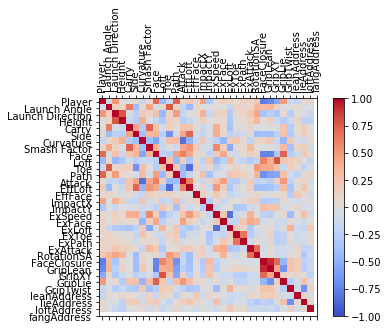

In [24]:
#keep all variables for now
corr = data_new.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_new.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_new.columns)
ax.set_yticklabels(data_new.columns)
plt.show()

In [25]:
#based off of correlation matrix we can eliminate more variables
#delete: Face Closure/Grip Twist/GripXY
data_new.drop(["FaceClosure", "GripTwist", "GripXY"
              ],axis=1,inplace=True)
#update column names
column_names = list(data_new)
print(data_new.shape)

(408, 30)


In [26]:
data_new.describe()

,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,Toe,...,ExToe,ExPath,ExAttack,RotationSA,GripLean,GripLie,leanAddress,lieAddress,loftAddress,fangAddress
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,32.015110,-0.519825,15.983275,65.582607,-0.651860,-0.094414,0.924661,0.754886,50.243876,-0.256917,...,-4.034559,-0.379879,1.122601,1407.525337,13.087797,30.183703,6.412682,33.042715,53.787533,-7.990652
std,3.167908,2.200906,3.741356,8.258507,2.566492,2.125264,0.064097,2.263437,2.916714,2.842598,...,1.131384,1.329547,1.434276,445.453686,3.263486,1.946870,3.345853,5.215022,4.127465,13.599568
min,15.628000,-5.582000,6.462037,39.597813,-7.932646,-8.081148,0.704823,-6.492820,40.299170,-8.283255,...,-7.486775,-4.760777,-8.207486,-1382.023000,5.141682,24.739190,-4.999854,-11.254880,28.388990,-68.775660
25%,30.268500,-1.871000,13.884276,63.122709,-2.074236,-1.243031,0.884655,-0.699634,48.467963,-1.574328,...,-4.838489,-1.018542,0.446460,1172.454750,11.065238,29.056460,4.690746,31.121828,50.603685,-14.342075
50%,32.295500,-0.530500,16.062542,67.523094,-0.818145,-0.182786,0.926385,0.732954,50.450255,0.051168,...,-4.009947,-0.473332,1.052898,1378.224413,13.137362,30.361606,6.370578,32.932465,54.523905,-10.282680
75%,34.044750,0.682750,18.230484,70.435571,0.675041,1.070204,0.974533,2.092448,52.156745,1.971375,...,-3.274212,0.028504,1.578582,1625.133000,14.835950,31.309793,8.354116,35.642785,56.988530,-5.302401
max,39.175000,8.374000,26.908422,81.994704,12.525524,6.093460,1.125149,9.152328,56.908440,7.086483,...,-0.872335,12.136380,14.591110,3232.023000,24.188710,35.227010,21.590390,68.359610,77.253150,68.277790


In [28]:
#scale the features to test variance
from sklearn.preprocessing import MinMaxScaler

data_scale = data_new.drop("Player", axis=1)

mms = MinMaxScaler()
mms.fit(data_scale)
data_scale = mms.transform(data_scale)

In [29]:
data_scale=pd.DataFrame(data_scale)
data_scale.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.892003,0.525294,0.626234,0.656931,0.538906,0.642976,0.340981,0.761221,0.870883,0.345948,...,0.394943,0.281093,0.452757,0.756758,0.191118,0.329621,0.124225,0.579821,0.648277,0.371293
1,0.830722,0.452780,0.536900,0.621232,0.576338,0.782466,0.172702,0.817916,0.893106,0.320877,...,0.299808,0.241155,0.419531,0.773490,0.238716,0.398206,0.145072,0.589322,0.598524,0.359443
2,0.779505,0.326741,0.484621,0.583469,0.498219,0.810522,0.179311,0.802681,0.861036,0.301983,...,0.331227,0.300580,0.448356,0.810477,0.223729,0.371649,0.072733,0.577312,0.597273,0.340231
3,0.840192,0.248065,0.639257,0.721500,0.417459,0.796293,0.287629,0.631886,0.886148,0.369252,...,0.145421,0.283662,0.430713,0.730559,0.210259,0.553560,0.114962,0.591691,0.562073,0.330963
4,0.846605,0.488105,0.621608,0.710948,0.660747,0.858493,0.234299,1.000000,0.970659,0.212384,...,0.092530,0.256379,0.438065,0.780465,0.204831,0.396022,0.126007,0.575934,0.569748,0.347884


In [30]:
data_scale.columns = column_names[1:len(column_names)]

In [31]:
data_scale_summary=data_scale.describe()
data_scale_summary=data_scale_summary.iloc[[2],:]
data_scale_summary

,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,Toe,...,ExToe,ExPath,ExAttack,RotationSA,GripLean,GripLie,leanAddress,lieAddress,loftAddress,fangAddress
std,0.134536,0.157703,0.182984,0.19479,0.125451,0.149935,0.152494,0.144673,0.175608,0.184948,...,0.171048,0.078685,0.062911,0.096543,0.171338,0.185632,0.12583,0.065503,0.084468,0.099228


In [32]:
sorted_data_scale_std=data_scale_summary.sort_values(data_scale_summary.last_valid_index(),axis=1)
sorted_data_scale_variance=sorted_data_scale_std**2
sorted_data_scale_variance

,ExAttack,lieAddress,ExPath,loftAddress,ImpactY,ExSpeed,RotationSA,fangAddress,Side,leanAddress,...,EffFace,Loft,EffLoft,ExFace,Height,Toe,GripLie,Carry,ExLoft,Path
std,0.003958,0.004291,0.006191,0.007135,0.007563,0.008302,0.009321,0.009846,0.015738,0.015833,...,0.030779,0.030838,0.031329,0.032584,0.033483,0.034206,0.034459,0.037943,0.038409,0.040133


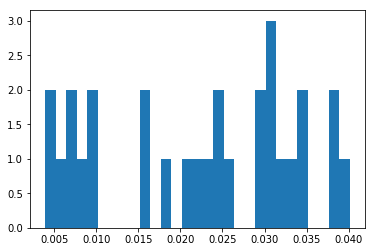

In [33]:
plt.hist(sorted_data_scale_variance.iloc[0,:],bins=29)
plt.show()

In [34]:
#based on above histogram, use .01 as variance threshold
#delete ExAttack/lieAddress/ExPath/ImpactY/ExSpeed/RotationSA/fangAddress
data_new.drop(["ExAttack", "lieAddress", "ExPath", "ImpactY", 
               "ExSpeed", "RotationSA", "fangAddress"
              ],axis=1,inplace=True)
#update column names
column_names = list(data_new)
print(data_new.shape)

# #Transform the Data back
# df=pd.DataFrame(mms.inverse_transform(data_scale))
# df.columns=column_names
# df.drop(['ExAttack','ExPath','RotationSA','ExSpeed'],axis=1,inplace=True)

(408, 23)


### Optional: Adjust data from shot angle offset

In [35]:
#directional needs to be adjusted for trackman shots: side/carry/launch direction
data_adjust = data_new[:]
data_adjust.head()

,Player,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,...,EffLoft,EffFace,ImpactX,ExFace,ExLoft,ExToe,GripLean,GripLie,leanAddress,loftAddress
0,ASHCRJ,36.632,1.749,19.266257,67.449641,3.092386,1.032791,0.848146,5.416595,54.76390,...,59.11526,6.242358,21.737920,6.247480,2.898667,-4.874446,8.781921,28.19620,-1.696680,60.06651
1,ASHCRJ,35.189,0.737,17.439694,65.936099,3.858185,3.009997,0.777414,6.303596,55.13301,...,60.86183,7.723471,5.669705,6.560531,3.487790,-5.503714,9.688515,28.91550,-1.142365,57.63536
2,ASHCRJ,33.983,-1.022,16.370781,64.335100,2.260003,3.407687,0.780192,6.065248,54.60035,...,60.16830,8.590155,17.153140,6.520727,3.193704,-5.295897,9.403057,28.63698,-3.065877,57.57423
3,ASHCRJ,35.412,-2.120,19.532534,70.187181,0.607811,3.205991,0.825721,3.393124,55.01744,...,61.11381,7.216184,14.698210,7.725823,3.832134,-6.524895,9.146500,30.54483,-1.942997,55.85423
4,ASHCRJ,35.563,1.230,19.171681,69.739778,5.585029,4.087657,0.803305,9.152328,56.42110,...,62.18489,12.181230,18.908430,8.851681,3.921463,-6.874744,9.043106,28.89260,-1.649299,56.22926


In [36]:
#full swing angle error from point of impact to target
theta = -.4

#ADJUST TMAN VARIABLES
#carry
carry_new = data_adjust['Carry'].apply(lambda x: math.cos(math.radians(theta))*x)
#side
side_new = data_adjust['Side'] - data_adjust['Carry'].apply(lambda x: math.tan(math.radians(theta))*x)
#launch direction
launch_direction_new = data_adjust['Launch Direction'] - theta
#curvature
curv_var = launch_direction_new.apply(lambda x: math.tan(x/360*2*math.pi))
curvature_new = side_new - carry_new*curv_var

In [37]:
#ADJUST MOCAP VARIABLES: based off of parker analysis: only face/path are affected by origin rotation
#path
path_new = data_adjust['Path'] - theta
#face angle
face_new = data_adjust['Face'] - theta

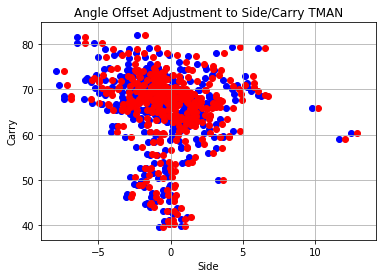

In [38]:
#display the shift we made to the data
plt.scatter(data_adjust['Side'], data_adjust['Carry'], color='b')
plt.scatter(side_new, carry_new, color='r')
plt.xlabel('Side')
plt.ylabel('Carry')
plt.title('Angle Offset Adjustment to Side/Carry TMAN')
plt.grid()
plt.show()

In [39]:
#replace old columns with new in new data frame
data_adjust['Carry'] = carry_new
data_adjust['Side'] = side_new
data_adjust['Launch Direction'] = launch_direction_new
data_adjust['Curvature'] = curvature_new
data_adjust['Path'] = path_new
data_adjust['Face'] = face_new

In [40]:
data_adjust.shape

(408, 23)

## R Full Swing Curve Pattern Analysis FDA Clustering

In [41]:
#create new columns for each new variable with key which is player names
data_adjust["X_Direction"] = data_adjust["Player"]
data_adjust["Y_Direction"] = data_adjust["Player"]
data_adjust["Z_Direction"] = data_adjust["Player"]
data_adjust["MOI_Axis"] = data_adjust["Player"]
data_adjust["Tempo"] = data_adjust["Player"]

In [42]:
#create dictionary fill function for this particular player group
#IMPORTANT: THOMPD removed
def rcurve_col_bins(int_vec):
    dictionary = {"ASHCRJ":int_vec[0],"BERTRT":int_vec[1],"BIUNDP":int_vec[2],"BROLUC":int_vec[3],"CORRAR":int_vec[4],
                  "CUTTIA":int_vec[5],"DOBSA":int_vec[6],"FAUSTR":int_vec[7],"GOLDEC":int_vec[8],"HARTLEJ":int_vec[9],
                  "KOVATM":int_vec[10],"LADUTL":int_vec[11],"LOCKEB":int_vec[12],"MAGOOK":int_vec[13],"MAHLEG":int_vec[14],
                  "MANCIJ":int_vec[15],"MARTEG":int_vec[16],"MATTHA":int_vec[17],"NOVAKJ":int_vec[18],"PETERM":int_vec[19],
                  "PIPPIR":int_vec[20],"PORATB":int_vec[21],"ROSAT":int_vec[22],"SAEWIJ":int_vec[23],"STINEW":int_vec[24],
                  "STONEC":int_vec[25],"THOMPD":int_vec[26],"ZAIDMT":int_vec[27]}
    return(dictionary)

In [43]:
#calculated curve clusters for each player using r fda curve analysis methods
xdir_vec = [1,0,1,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1]
ydir_vec = [0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,0]
zdir_vec = [0,1,0,0,1,0,1,1,1,1,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1]
moi_axis = [0,0,0,1,0,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,0,1,1,1,1,1,1]
tempo = [2,0,0,0,0,1,1,1,0,0,1,0,1,1,0,2,2,1,0,1,1,0,2,1,2,1,1,1]

In [44]:
r_xdir = rcurve_col_bins(xdir_vec)
r_ydir = rcurve_col_bins(ydir_vec)
r_zdir = rcurve_col_bins(zdir_vec)
r_moi_axis = rcurve_col_bins(moi_axis)
r_tempo = rcurve_col_bins(tempo)

In [45]:
data_adjust['X_Direction'] = [r_xdir[item] for item in data_adjust['X_Direction']]
data_adjust['Y_Direction'] = [r_ydir[item] for item in data_adjust['Y_Direction']]
data_adjust['Z_Direction'] = [r_zdir[item] for item in data_adjust['Z_Direction']]
data_adjust['MOI_Axis'] = [r_moi_axis[item] for item in data_adjust['MOI_Axis']]
data_adjust['Tempo'] = [r_tempo[item] for item in data_adjust['Tempo']]

In [46]:
#output new columns
data_adjust.head()

,Player,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,...,ExToe,GripLean,GripLie,leanAddress,loftAddress,X_Direction,Y_Direction,Z_Direction,MOI_Axis,Tempo
0,ASHCRJ,36.632,2.149,19.266257,67.447997,3.563281,1.032313,0.848146,5.816595,54.76390,...,-4.874446,8.781921,28.19620,-1.696680,60.06651,1,0,0,0,2
1,ASHCRJ,35.189,1.137,17.439694,65.934492,4.318513,3.009911,0.777414,6.703596,55.13301,...,-5.503714,9.688515,28.91550,-1.142365,57.63536,1,0,0,0,2
2,ASHCRJ,33.983,-0.622,16.370781,64.333532,2.709154,3.407583,0.780192,6.465248,54.60035,...,-5.295897,9.403057,28.63698,-3.065877,57.57423,1,0,0,0,2
3,ASHCRJ,35.412,-1.720,19.532534,70.185471,1.097818,3.205395,0.825721,3.793124,55.01744,...,-6.524895,9.146500,30.54483,-1.942997,55.85423,1,0,0,0,2
4,ASHCRJ,35.563,1.630,19.171681,69.738079,6.071913,4.087408,0.803305,9.552328,56.42110,...,-6.874744,9.043106,28.89260,-1.649299,56.22926,1,0,0,0,2


### K-MEANS CLUSTERING: Cluster each column into optimal number of bins

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [79]:
#data set for this section
df_kclus = data_adjust.iloc[:,0:23]
#update column names again
column_names = list(data_adjust)
#remove 'Player' column for our k clustering analysis
column_names.remove('Player')

In [49]:
#Function to output optimal k value plot
#input: column number to cluster/DataFrame
def Kplot(column,df):
    #remove player column for cluster analysis
    test_clus = df.drop('Player', axis=1)
    
    #data frame with zeros/desired feature
    test_clus['Zeros'] = 0
    test_clus=test_clus[['Zeros',column_names[0]]]

    #for each kval, initialize k-means and identify sum of squared distances of samples to nearest cluster center
    Sum_of_squared_distances=[]
    K = range(1,10)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(test_clus)
        Sum_of_squared_distances.append(km.inertia_)

    #output plot to user to see the optimal k val
    print(column_names[column])
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

In [50]:
def clusterFUN(column,df,num_clust):
    #data frame with zeros/desired feature
    test_clus = df.drop('Player', axis=1)
    test_clus['Zeros'] = 0
    test_clus=test_clus[['Zeros',column_names[column]]]
    
    kmeans = KMeans(n_clusters=num_clust, random_state=0).fit(test_clus)
    print(column_names[column])
    print(kmeans.cluster_centers_[:,1])
    test_clus['Kmeans Labels']=kmeans.labels_
    print(test_clus['Kmeans Labels'].value_counts())

    df[column_names[column]]=kmeans.labels_

In [51]:
def clusterFUN_fill(df,num_clust_list):
    for i in range(len(num_clust_list)):
        #data frame with zeros/desired feature
        test_clus = df.drop('Player', axis=1)
        test_clus['Zeros'] = 0
        test_clus=test_clus[['Zeros',column_names[i]]]
    
        kmeans = KMeans(n_clusters=num_clust_list[i], random_state=0).fit(test_clus)
        print(column_names[i])
        print(kmeans.cluster_centers_[:,1])
        test_clus['Kmeans Labels']=kmeans.labels_
        print(test_clus['Kmeans Labels'].value_counts())
        print("")

        df[column_names[i]]=kmeans.labels_

Launch Direction


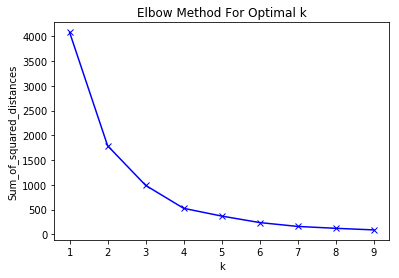

In [52]:
Kplot(1,df_kclus)

In [72]:
df_kclus.head()

,Player,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,...,EffLoft,EffFace,ImpactX,ExFace,ExLoft,ExToe,GripLean,GripLie,leanAddress,loftAddress
0,ASHCRJ,36.632,0,2,67.447997,0,1.032313,0.848146,5.816595,54.76390,...,59.11526,6.242358,21.737920,6.247480,2.898667,-4.874446,8.781921,28.19620,-1.696680,0
1,ASHCRJ,35.189,1,2,65.934492,0,3.009911,0.777414,6.703596,55.13301,...,60.86183,7.723471,5.669705,6.560531,3.487790,-5.503714,9.688515,28.91550,-1.142365,0
2,ASHCRJ,33.983,1,0,64.333532,0,3.407583,0.780192,6.465248,54.60035,...,60.16830,8.590155,17.153140,6.520727,3.193704,-5.295897,9.403057,28.63698,-3.065877,0
3,ASHCRJ,35.412,2,2,70.185471,0,3.205395,0.825721,3.793124,55.01744,...,61.11381,7.216184,14.698210,7.725823,3.832134,-6.524895,9.146500,30.54483,-1.942997,2
4,ASHCRJ,35.563,0,2,69.738079,3,4.087408,0.803305,9.552328,56.42110,...,62.18489,12.181230,18.908430,8.851681,3.921463,-6.874744,9.043106,28.89260,-1.649299,0


In [76]:
#clusterFUN(column,df,num_clust):
clusterFUN(1,df_kclus,4)

Launch Direction
[-3.25805921  0.83293836 -0.95869231  3.60258929]
1    146
2    130
0     76
3     56
Name: Kmeans Labels, dtype: int64


In [80]:
#after going through each variable, input number of clusters for each column in a list
num_clust_list=[2,5,3,2,3,3,3,3,2,3,3,4,4,3,3,3,3,3,2,2,3,3]

In [81]:
clusterFUN_fill(data_adjust,num_clust_list)

Launch Angle
[1.33226763e-15 1.00000000e+00]
1    256
0    152
Name: Kmeans Labels, dtype: int64

Launch Direction
[ 4.0000000e+00 -4.4408921e-16  3.0000000e+00  1.0000000e+00
  2.0000000e+00]
2    136
3     90
1     81
4     58
0     43
Name: Kmeans Labels, dtype: int64

Height
[ 2.00000000e+00 -2.66453526e-15  1.00000000e+00]
0    222
2     95
1     91
Name: Kmeans Labels, dtype: int64

Carry
[ 1.0000000e+00 -4.4408921e-16]
0    337
1     71
Name: Kmeans Labels, dtype: int64

Side
[-1.99840144e-15  2.00000000e+00  1.00000000e+00]
1    239
2    107
0     62
Name: Kmeans Labels, dtype: int64

Curvature
[-8.8817842e-16  2.0000000e+00  1.0000000e+00]
0    240
2    100
1     68
Name: Kmeans Labels, dtype: int64

Smash Factor
[ 1.0000000e+00 -8.8817842e-16  2.0000000e+00]
0    181
2    138
1     89
Name: Kmeans Labels, dtype: int64

Face
[1.99840144e-15 2.00000000e+00 1.00000000e+00]
1    197
0    132
2     79
Name: Kmeans Labels, dtype: int64

Loft
[ 1.00000000e+00 -1.66533454e-15]
0    2

In [82]:
#add response variable back in to be split into test/train sets
data_adjust['Grind']=response

In [88]:
data_new.head()

,Player,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,...,EffLoft,EffFace,ImpactX,ExFace,ExLoft,ExToe,GripLean,GripLie,leanAddress,loftAddress
0,ASHCRJ,36.632,2.149,19.266257,67.447997,3.563281,1.032313,0.848146,5.816595,54.76390,...,59.11526,6.242358,21.737920,6.247480,2.898667,-4.874446,8.781921,28.19620,-1.696680,60.06651
1,ASHCRJ,35.189,1.137,17.439694,65.934492,4.318513,3.009911,0.777414,6.703596,55.13301,...,60.86183,7.723471,5.669705,6.560531,3.487790,-5.503714,9.688515,28.91550,-1.142365,57.63536
2,ASHCRJ,33.983,-0.622,16.370781,64.333532,2.709154,3.407583,0.780192,6.465248,54.60035,...,60.16830,8.590155,17.153140,6.520727,3.193704,-5.295897,9.403057,28.63698,-3.065877,57.57423
3,ASHCRJ,35.412,-1.720,19.532534,70.185471,1.097818,3.205395,0.825721,3.793124,55.01744,...,61.11381,7.216184,14.698210,7.725823,3.832134,-6.524895,9.146500,30.54483,-1.942997,55.85423
4,ASHCRJ,35.563,1.630,19.171681,69.738079,6.071913,4.087408,0.803305,9.552328,56.42110,...,62.18489,12.181230,18.908430,8.851681,3.921463,-6.874744,9.043106,28.89260,-1.649299,56.22926


In [85]:
#Final Table Ready for Analysis
data_adjust.head()

,Player,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,...,GripLean,GripLie,leanAddress,loftAddress,X_Direction,Y_Direction,Z_Direction,MOI_Axis,Tempo,Grind
0,ASHCRJ,1,1,2,0,0,0,1,2,0,...,0,1,2,1,1,0,0,0,2,0
1,ASHCRJ,1,1,0,0,0,2,1,2,0,...,0,1,2,1,1,0,0,0,2,0
2,ASHCRJ,1,2,0,0,0,2,1,2,0,...,0,1,2,1,1,0,0,0,2,0
3,ASHCRJ,1,3,2,0,1,2,1,2,0,...,0,0,2,0,1,0,0,0,2,0
4,ASHCRJ,1,1,2,0,0,2,1,2,0,...,0,1,2,1,1,0,0,0,2,0


## Build New Data Frame of Player Averages

In [89]:
data_avg = data_adjust.groupby('Player').apply(pd.DataFrame.mode).reset_index(drop=True)
NaN_rows = data_avg.isnull().any(axis=1)
data_avg = data_avg.drop(NaN_rows[NaN_rows == True].index).reset_index(drop=True)
data_avg

,Player,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,...,GripLean,GripLie,leanAddress,loftAddress,X_Direction,Y_Direction,Z_Direction,MOI_Axis,Tempo,Grind
0,ASHCRJ,1.0,1.0,2.0,0.0,0.0,2.0,1.0,2.0,0.0,...,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0
1,BERTRT,0.0,3.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,...,1.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0
2,BIUNDP,1.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
3,BROLUC,1.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0
4,CORRAR,1.0,3.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
5,CUTTIA,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0
6,DOBSA,1.0,4.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,...,0.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,2.0
7,FAUSTR,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0
8,GOLDEC,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,3.0
9,HARTLEJ,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0


SPLIT DATA: TRAIN/TEST

In [90]:
from sklearn.model_selection import train_test_split
#don't need player column anymore
data_avg = data_avg.drop('Player', axis=1)

train_data, test_data = train_test_split(data_avg, test_size=.12)
print(train_data.shape) 
print(test_data.shape)

(24, 28)
(4, 28)


In [91]:
train_data.head()

,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,Toe,...,GripLean,GripLie,leanAddress,loftAddress,X_Direction,Y_Direction,Z_Direction,MOI_Axis,Tempo,Grind
2,1.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0
20,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0
25,1.0,2.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,2.0,...,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0
24,1.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
9,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0


In [92]:
#reset index values
train_data.reset_index(drop=True,inplace=True)
test_data.reset_index(drop=True,inplace=True)

In [93]:
#now take out the response variable
target = train_data['Grind']
train_data=train_data.drop('Grind', axis=1)

train_data.shape, test_data.shape

((24, 27), (4, 28))

In [94]:
train_data.head()

,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,Toe,...,ExToe,GripLean,GripLie,leanAddress,loftAddress,X_Direction,Y_Direction,Z_Direction,MOI_Axis,Tempo
0,1.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,1.0,2.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,2.0,...,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
3,1.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0
4,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,...,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [95]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

Cross Validation: KFold

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold=KFold(n_splits=10, shuffle=True, random_state=0)

KNN

In [97]:
clf = KNeighborsClassifier()
scoring='accuracy'
score=cross_val_score(estimator=clf, X=train_data, y=target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.66666667 0.33333333 0.         0.         0.         0.5
 0.         0.5        0.5        0.5       ]


In [98]:
#kNN score
round(np.mean(score)*100,2)

30.0

Decision Tree

In [99]:
clf=DecisionTreeClassifier()
scoring='accuracy'
score=cross_val_score(estimator=clf, X=train_data, y=target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.33333333 0.         0.33333333 0.33333333 0.         0.5
 0.5        0.         0.5        0.5       ]


In [100]:
#decision tree score
print(round(np.mean(score)*100,2))

30.0


Random Forest

In [109]:
clf = RandomForestClassifier(n_estimators=12)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.33333333 1.         0.         0.33333333 0.         0.5
 0.5        0.5        1.         0.5       ]


In [110]:
#Random tree score
print(round(np.mean(score)*100,2))

46.67


Naive Bayes

In [103]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.33333333 0.66666667 0.33333333 0.33333333 0.         1.
 0.5        0.         0.5        0.        ]


In [104]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

36.67

SVM

In [105]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.33333333 0.33333333 0.         0.         0.         0.5
 0.5        0.5        1.         0.        ]


In [106]:
round(np.mean(score)*100,2)

31.67

TEST MODEL

In [111]:
test_data.head()

,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,Toe,...,GripLean,GripLie,leanAddress,loftAddress,X_Direction,Y_Direction,Z_Direction,MOI_Axis,Tempo,Grind
0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0
1,1.0,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,...,0.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,3.0
2,0.0,3.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,...,1.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,3.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0


In [124]:
#build best model
#clf = SVC()
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [125]:
names = list(train_data)

In [126]:
for names, importance in zip(names, clf.feature_importances_):
    print(names, "=", importance)

Launch Angle = 0.03991969301863164
Launch Direction = 0.08269429833347648
Height = 0.026358502940174052
Carry = 0.004335390636760499
Side = 0.01463445645263828
Curvature = 0.0
Smash Factor = 0.05480605571461602
Face = 0.04358692823446094
Loft = 0.04387163357835776
Toe = 0.02970718197425209
Path = 0.021971932276721836
Attack = 0.08428357416529203
EffLoft = 0.05151828150078798
EffFace = 0.024453877393024768
ImpactX = 0.07420116830085674
ExFace = 0.09149573345660547
ExLoft = 0.029608033533516195
ExToe = 0.07446176767997591
GripLean = 0.0
GripLie = 0.0021770682148040637
leanAddress = 0.016431998494778763
loftAddress = 0.06129111603944069
X_Direction = 0.010522526932615368
Y_Direction = 0.021580229725026105
Z_Direction = 0.007634718222953514
MOI_Axis = 0.015015217899140036
Tempo = 0.07343861528109276


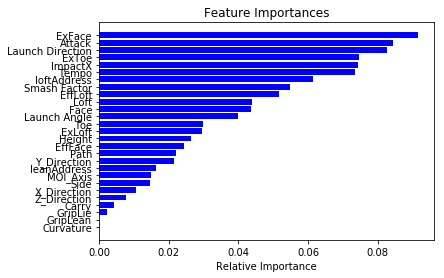

In [127]:
#plot importance
names = list(train_data)
features = names
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [141]:
#test_data_pred = data_avg
#test_data_pred = test_data_pred.drop("Grind", axis=1)

In [142]:
test_data_pred=test_data.drop("Grind",axis=1)

In [143]:
#test data prediction
prediction = clf.predict(test_data_pred)

In [144]:
test_data.head()

,Launch Angle,Launch Direction,Height,Carry,Side,Curvature,Smash Factor,Face,Loft,Toe,...,GripLean,GripLie,leanAddress,loftAddress,X_Direction,Y_Direction,Z_Direction,MOI_Axis,Tempo,Grind
0,1.0,1.0,2.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,...,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0
1,1.0,1.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,...,0.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,3.0
2,0.0,3.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,1.0,...,1.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0
3,1.0,3.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0


In [138]:
submission=pd.DataFrame({
    "Actual Grind": test_data['Grind'],
    "Predicted Grind": prediction
})
submission.head(100)

,Actual Grind,Predicted Grind
0,3.0,2.0
1,3.0,0.0
2,1.0,4.0
3,0.0,0.0


In [139]:
num_wrong=submission[(submission['Actual Grind']==submission['Predicted Grind'])==False].shape[0]

In [140]:
percent_correct=(1-num_wrong/test_data.shape[0])*100
percent_correct

25.0

In [136]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(test_data['Grind'] , prediction)
#rows: actual / columns: predicted
conf_mx

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int64)

In [145]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(clf, train_data, target, cv=2)
conf_mx = confusion_matrix(target , y_train_pred)
conf_mx

array([[4, 0, 2, 0, 0],
       [1, 0, 5, 0, 0],
       [2, 0, 1, 0, 2],
       [3, 1, 0, 0, 0],
       [1, 1, 1, 0, 0]], dtype=int64)

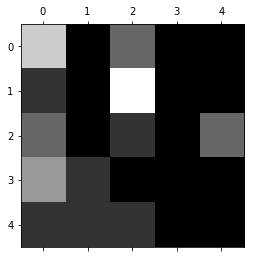

In [146]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

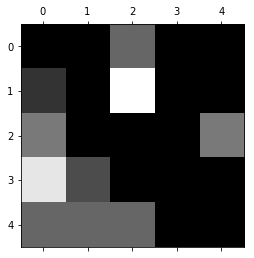

In [147]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## Post Analysis Evaluation

In [ ]:
#error analysis
y_train_pred = cross_val_predict(clf, train_data, target,cv=3)